In [1]:
import time
start = time.time()
import pylab as pl, numpy as np, os
from ImageD11 import transform
from ImageD11.transformer import transformer
from ImageD11.parameters import read_par_file
from ImageD11.columnfile import columnfile
import h5py
import scipy.optimize
import fabio
import pandas as pd
%matplotlib notebook

In [2]:
df = fabio.open("e2dx.edf").data
ds = fabio.open("e2dy.edf").data

In [3]:
t = transformer()
t.loadfiltered("eigerSpatial/109673.flt")
c = t.colfile
c.sc[:] = ds[np.round( c.s_raw[:].astype(int) ), np.round( c.f_raw[:].astype(int) ) ] + c.s_raw[:]
c.fc[:] = df[np.round( c.s_raw[:].astype(int) ), np.round( c.f_raw[:].astype(int) ) ] + c.f_raw[:]
t.loadfileparameters("eigerSpatial/109673-fit-corrected.par")
t.compute_tth_eta()
t.addcellpeaks()

In [4]:
c.writefile("eigerSpatial/109673-distortion-corrected.flt")

<IPython.core.display.Javascript object>


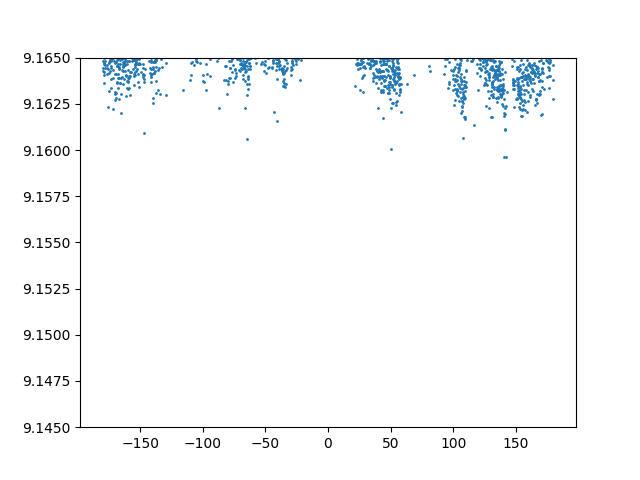

(9.145, 9.165)

In [5]:
pl.scatter(c.eta,c.tth, s = 1, cmap = 'jet')
pl.ylim((9.145, 9.165))